# Smooth and Add data

In [2]:
import pandas as pd
import ssd50 as ss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns



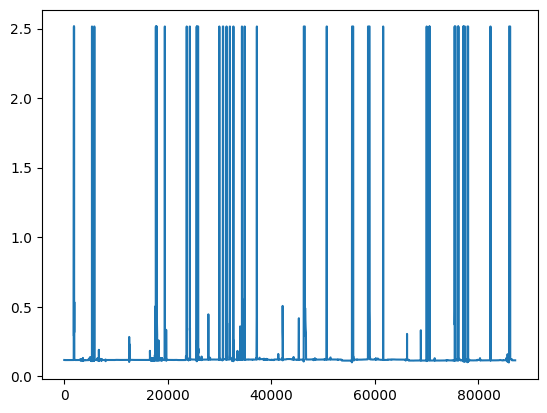

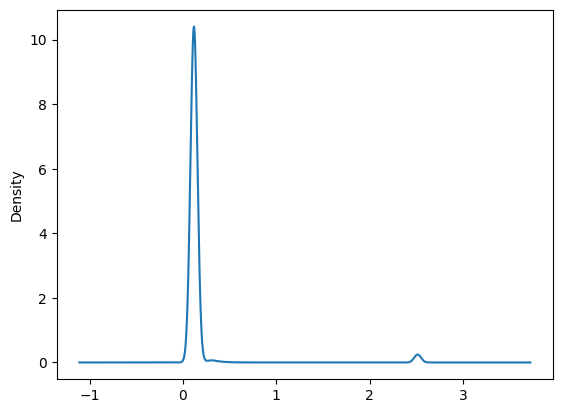

In [9]:
df['D50C'].plot()
plt.show()
df['D50C'].plot(kind='kde')
plt.show()

In [ ]:
# dfs=pd.read_excel('smoothed_data.xlsx',header=0)

# dfs.head()
#dfs=dfs.set_index('minute')

#df = df.clip(lower=0)  

#dfs['D50C']=dfs.apply(lambda row: ss.D50_4_CL(row['tons /hr'],row['Cyc_pressure']),axis=1)


In [ ]:
dfs.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

In [3]:
df = pd.read_excel('filled_cleansed_data.xlsx',header=0)
df=df.set_index('minute')
df.describe()



,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_BP2,Mill_BP3,Mill_BP4,Mill_power,Sump_level,Cyc_density,Cyc_pressure
count,87091.000000,87091.000000,87091.000000,87091.000000,87091.000000,87091.000000,87091.000000,87091.000000,87091.000000,87091.000000,87091.000000,87091.000000,87091.000000
mean,96.405713,16.405496,14.433841,472.987575,45.099075,5931.164001,5842.070051,5734.302537,5120.388251,2003.851064,41.111522,52.266667,10.474345
std,25.271747,6.779280,2.812922,95.204945,16.290779,492.160284,473.839219,460.187947,434.871781,415.549143,11.408267,9.075469,2.430394
min,0.000000,0.011161,0.000000,0.000000,0.316527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.590546,14.866428,15.134733,456.256104,37.918356,5947.575195,5851.895752,5712.375244,5071.484619,2036.500000,36.316799,53.427214,9.850476
50%,103.390297,16.164457,15.139745,491.857941,45.786087,6038.745605,5942.765625,5789.700684,5148.795898,2154.000000,40.089287,54.019882,10.910308
75%,106.395046,17.990241,15.155663,521.534882,54.256765,6095.027588,5994.305420,5850.122070,5206.575684,2168.000000,43.654875,54.594410,11.460217
max,212.381058,110.265762,15.185266,725.713135,190.012161,6418.649902,6489.573242,7958.636719,6857.583496,2352.000000,103.256409,60.934116,23.790096


In [31]:

# clean the data by removing any null values and outliers

#df = df[df['column_name'].between(lower_bound, upper_bound)]

# calculate the rate of change for the desired columns

dfp=df.clip(0.5)
dfp = dfp.pct_change()

# apply a filter to remove any extreme values
#df = df[df['rate_of_change'].between(lower_bound, upper_bound)]

dfp=dfp.dropna()

dfp.describe()

,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_BP2,Mill_BP3,Mill_BP4,Mill_power,Sump_level,Cyc_density,Cyc_pressure
count,87090.000000,87090.000000,87090.000000,87090.000000,87090.000000,87090.000000,87090.000000,87090.000000,87090.000000,87090.000000,87090.000000,87090.000000,87090.000000
mean,0.512562,0.023252,0.007586,0.201839,0.428918,0.461359,0.241196,0.535132,0.541549,0.045523,0.037949,0.063762,0.016508
std,10.011597,1.346732,0.466030,10.259381,6.212074,66.637755,39.221600,73.486600,66.911220,2.883475,1.560157,2.419621,0.565741
min,-0.997645,-0.995465,-0.967064,-0.998951,-0.996912,-0.999911,-0.999531,-0.999497,-0.999332,-0.999776,-0.995147,-0.991243,-0.976009
25%,-0.012091,-0.013397,-0.000333,-0.007212,-0.086103,-0.002336,-0.001805,-0.007431,-0.008002,-0.001860,-0.091241,-0.001081,-0.000056
50%,0.000000,-0.000147,0.000000,-0.000112,-0.000699,0.000000,0.000068,0.000000,-0.000308,0.000000,0.001809,0.000134,0.000000
75%,0.011628,0.012427,0.000333,0.007113,0.092098,0.002327,0.001836,0.007534,0.007628,0.001867,0.103507,0.001565,0.000056
max,382.389038,138.026779,29.317137,999.933960,291.081970,12264.950195,10824.171875,12881.961914,12972.242188,252.888889,205.353027,119.924614,40.869617


In [38]:

upper= 60
dfc = df[dfp < upper]
dfc.describe()

,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_BP2,Mill_BP3,Mill_BP4,Mill_power,Sump_level,Cyc_density,Cyc_pressure
count,86876.000000,87080.000000,87090.000000,87037.000000,86871.000000,87078.000000,87080.000000,87077.000000,87080.000000,87068.000000,87073.000000,87031.000000,87090.000000
mean,96.387593,16.401093,14.433833,473.049614,45.052519,5931.749378,5842.551180,5734.889362,5120.705107,2003.807392,41.109521,52.270635,10.474336
std,25.271687,6.766161,2.812937,95.137699,16.233456,488.904395,471.191102,456.739983,433.330916,415.579436,11.406076,9.075829,2.430406
min,0.000000,0.011161,0.000000,0.000000,0.316527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.597044,14.866363,15.134733,456.292206,37.898226,5947.664307,5851.921021,5712.420898,5071.501343,2036.000000,36.316788,53.428638,9.850468
50%,103.390034,16.164170,15.139745,491.886078,45.765171,6038.767090,5942.778076,5789.713379,5148.799316,2154.000000,40.088779,54.020298,10.910293
75%,106.388203,17.989910,15.155663,521.537476,54.232672,6095.031860,5994.305786,5850.120117,5206.577637,2168.000000,43.653454,54.594561,11.460218
max,212.381058,110.265762,15.185266,725.713135,190.012161,6418.649902,6489.573242,7958.636719,6857.583496,2327.000000,103.256409,60.934116,23.790096


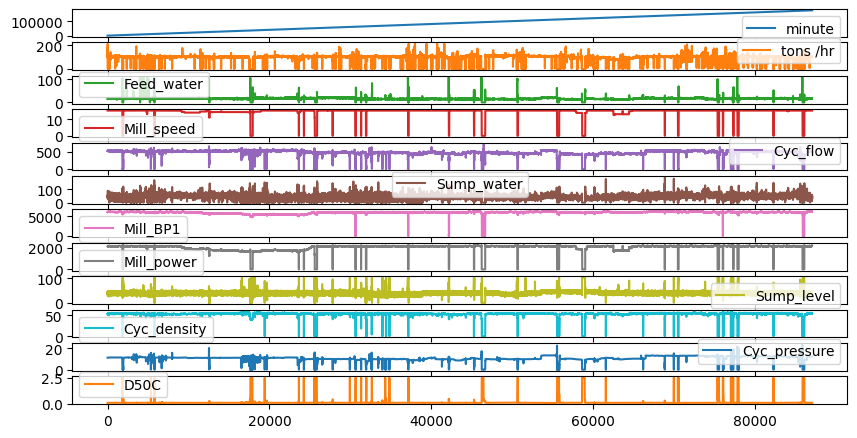

In [10]:
#df.describe()
df.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()


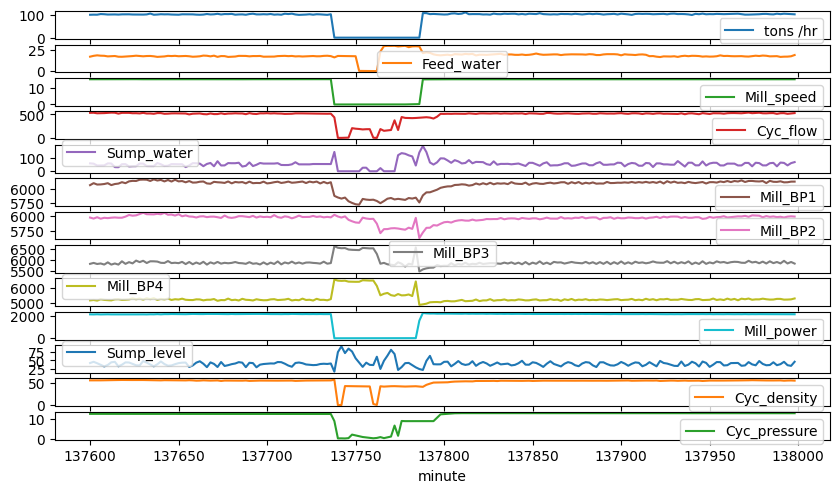

NameError: name 'dfc' is not defined

In [7]:
df.iloc[68800:69000].plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()
len(dfc)

In [4]:
df=df.clip(0.00001)

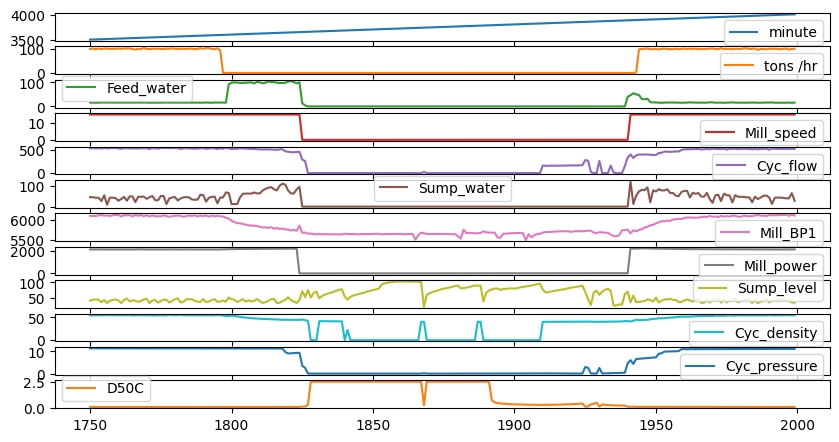

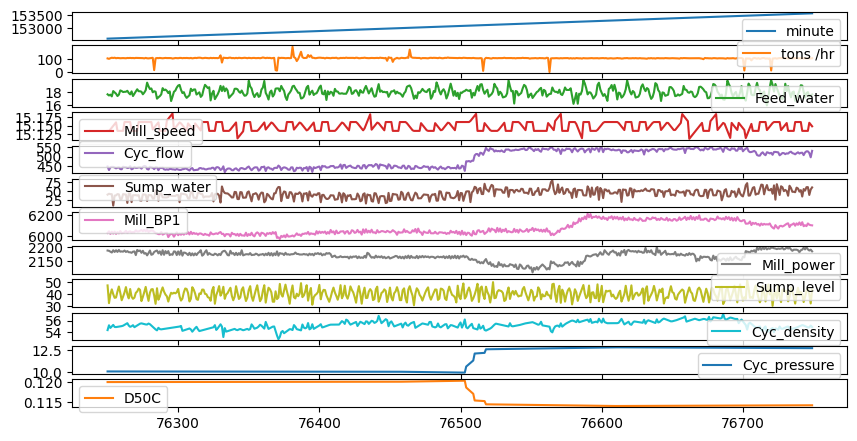

In [15]:
data0=df.copy()
data=data0.iloc[1750:2000, :]
data1=data0.iloc[5750:6000, :]
#data1=data0.iloc[39900:40100, :]   #tph spike
data1=data0.iloc[76250:76750, :]   #tph spike
data.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()
data1.plot(kind='line',subplots=True,layout=(14,1),figsize=(10,6))
plt.show()

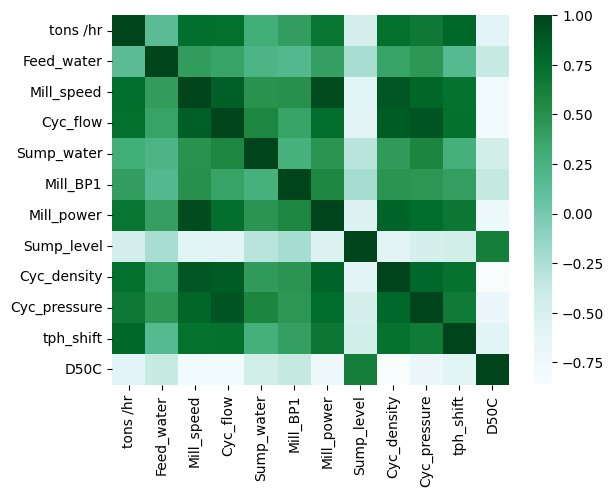

In [71]:
df=df.drop(['Mill_BP2','Mill_BP3','Mill_BP4'],axis=1)
sns.heatmap(df.corr(),cmap='BuGn')
plt.show()


In [6]:
# # # df['tph_shift']=df['tons /hr']
# # shift column 'A' down 10 rows and add 10 NaN values
df['tph_shift']=df['tons /hr'].shift(6).fillna(np.nan)   #shift 12 minutes tph

# concatenate the original and shifted columns
#df = pd.concat([df[['B', 'C']], df['A_shifted'], df['A']], axis=1)

# drop any rows with NaN values
df = df.dropna()
df.head()

,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_BP2,Mill_BP3,Mill_BP4,Mill_power,Sump_level,Cyc_density,Cyc_pressure,tph_shift
minute,,,,,,,,,,,,,,
12.0,102.462509,15.509874,15.160000,525.208252,50.587109,6104.048340,6018.370117,5882.355469,5180.477539,2151.0,40.304512,54.255432,11.241975,102.936172
14.0,103.333893,16.375196,15.160000,529.151917,54.062538,6108.159180,6018.272949,5891.432617,5280.733398,2155.0,43.349667,54.202900,11.241036,103.558838
16.0,103.808968,16.706270,15.160000,527.527954,43.480278,6085.975586,6022.613281,5860.468750,5213.466309,2160.0,46.226486,54.150364,11.240097,104.628387
18.0,102.219231,17.050024,15.156041,520.946472,37.862888,6116.854980,6025.251953,5858.438965,5245.921875,2153.0,38.813515,54.099995,11.239159,103.977753
20.0,102.523087,16.613831,15.150989,520.562073,38.544147,6100.854492,6013.996094,5843.971191,5229.332520,2162.0,34.497410,54.051334,11.238220,102.229675


In [7]:
#df.dropna(inplace=True)

df.head(11)

# Apply D50C calculation

In [3]:
df= pd.read_excel('D50_data_add.xlsx',header=0)
df=df.drop('Unnamed: 0',axis=1)
df.head()



,minute,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_power,Sump_level,Cyc_density,Cyc_pressure,tph_shift,D50C
0,12.0,102.462509,15.509874,15.160000,525.208252,50.587109,6104.048340,2151.0,40.304512,54.255432,11.241975,102.936172,0.117296
1,14.0,103.333893,16.375196,15.160000,529.151917,54.062538,6108.159180,2155.0,43.349667,54.202900,11.241036,103.558838,0.117299
2,16.0,103.808968,16.706270,15.160000,527.527954,43.480278,6085.975586,2160.0,46.226486,54.150364,11.240097,104.628387,0.117301
3,18.0,102.219231,17.050024,15.156041,520.946472,37.862888,6116.854980,2153.0,38.813515,54.099995,11.239159,103.977753,0.117303
4,20.0,102.523087,16.613831,15.150989,520.562073,38.544147,6100.854492,2162.0,34.497410,54.051334,11.238220,102.229675,0.117305


In [16]:
df=df.set_index('minute')
df.describe()

,minute,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_power,Sump_level,Cyc_density,Cyc_pressure,D50C
count,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000
mean,87108.340104,96.405228,16.405511,14.433792,472.983935,45.099104,5931.151818,2003.840294,41.111579,52.266530,10.474292,0.175843
std,50295.817950,25.272549,6.779508,2.813010,95.207208,16.291171,492.175031,415.561431,11.408603,9.075766,2.430468,0.357555
min,12.000000,0.000010,0.011161,0.000010,0.000010,0.316527,0.000010,0.000010,0.000010,0.000010,0.000010,0.099463
25%,43554.000000,99.590088,14.866427,15.134733,456.254913,37.918697,5947.561523,2036.000000,36.316788,53.427094,9.850447,0.116801
50%,87096.000000,103.390297,16.164457,15.139745,491.852570,45.786087,6038.729004,2154.000000,40.089287,54.019855,10.910081,0.118072
75%,130638.000000,106.395149,17.990374,15.155663,521.534058,54.256924,6095.021484,2168.000000,43.654884,54.594421,11.460250,0.120756
max,174239.998583,212.381058,110.265762,15.185266,725.713135,190.012161,6418.649902,2352.000000,103.256409,60.934116,23.790096,2.514608


In [ ]:

df['D50C']=df.apply(lambda row: ss.D50_meas_vol(row['Cyc_flow'],row['tph_shift'],row['Cyc_pressure']),axis=1)
df.head()

In [6]:
#df=df.drop(['Mill_BP2','Mill_BP3','Mill_BP4'],axis=1)
#df=df.reset_index()

df.to_excel('D50_data_add.xlsx',header=True) #index=True)

In [13]:
df.describe()

,minute,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_BP2,Mill_BP3,Mill_BP4,Mill_power,Sump_level,Cyc_density,Cyc_pressure,tph_shift,D50C
count,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000
mean,87108.340104,96.405228,16.405511,14.433792,472.983935,45.099104,5931.151818,5842.057369,5734.291504,5120.381093,2003.840294,41.111579,52.266530,10.474292,96.405134,0.260806
std,50295.817950,25.272549,6.779508,2.813010,95.207208,16.291171,492.175031,473.853075,460.201814,434.885826,415.561431,11.408603,9.075766,2.430468,25.272519,0.530317
min,12.000000,0.000010,0.011161,0.000010,0.000010,0.316527,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.147522
25%,43554.000000,99.590088,14.866427,15.134733,456.254913,37.918697,5947.561523,5851.887207,5712.371094,5071.470703,2036.000000,36.316788,53.427094,9.850447,99.590088,0.173237
50%,87096.000000,103.390297,16.164457,15.139745,491.852570,45.786087,6038.729004,5942.759766,5789.695312,5148.787598,2154.000000,40.089287,54.019855,10.910081,103.390205,0.175122
75%,130638.000000,106.395149,17.990374,15.155663,521.534058,54.256924,6095.021484,5994.292480,5850.110352,5206.564453,2168.000000,43.654884,54.594421,11.460250,106.395149,0.179103
max,174239.998583,212.381058,110.265762,15.185266,725.713135,190.012161,6418.649902,6489.573242,7958.636719,6857.583496,2352.000000,103.256409,60.934116,23.790096,212.381058,3.729611


In [ ]:
#with 5th percentile of feed tph
avoid_off = df[(df['tons /hr'] > df['tons /hr'].quantile(0.05)) ] #& (df < upper_bound)]
avoid_off.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()


In [ ]:
da=df.copy()
da = df[(df['tons /hr'] > df['tons /hr'].quantile(0.05)) ] #& (df < upper_bound)]
avoid_off = da[(da > da.quantile(0.01)) & (da < da.quantile(0.99)) ]
avoid_off.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

In [ ]:
smooth_df = avoid_off.interpolate(method='slinear', limit_direction='both', axis=0)
smooth_df.plot(kind='line',subplots=True,layout=(12,1),figsize=(10,6))
plt.show()

In [ ]:
smooth_df.to_excel('smoothed_data.xlsx',index=False,header=True)


In [3]:
#df = (df - df.min())/(df.max() - df.min())

# Scaling

In [8]:
df= pd.read_excel('D50_data_add.xlsx',header=0)
df=df.drop('Unnamed: 0',axis=1)
df.head()


,minute,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_power,Sump_level,Cyc_density,Cyc_pressure,D50C
0,12.0,102.462509,15.509874,15.160000,525.208252,50.587109,6104.048340,2151.0,40.304512,54.255432,11.241975,0.117296
1,14.0,103.333893,16.375196,15.160000,529.151917,54.062538,6108.159180,2155.0,43.349667,54.202900,11.241036,0.117299
2,16.0,103.808968,16.706270,15.160000,527.527954,43.480278,6085.975586,2160.0,46.226486,54.150364,11.240097,0.117301
3,18.0,102.219231,17.050024,15.156041,520.946472,37.862888,6116.854980,2153.0,38.813515,54.099995,11.239159,0.117303
4,20.0,102.523087,16.613831,15.150989,520.562073,38.544147,6100.854492,2162.0,34.497410,54.051334,11.238220,0.117305


In [5]:

df=df.set_index('minute')
df=df.drop('tph_shift',axis=1)
df.describe()

,minute,tons /hr,Feed_water,Mill_speed,Cyc_flow,Sump_water,Mill_BP1,Mill_power,Sump_level,Cyc_density,Cyc_pressure,D50C
count,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000,87085.000000
mean,87108.340104,96.405228,16.405511,14.433792,472.983935,45.099104,5931.151818,2003.840294,41.111579,52.266530,10.474292,0.175843
std,50295.817950,25.272549,6.779508,2.813010,95.207208,16.291171,492.175031,415.561431,11.408603,9.075766,2.430468,0.357555
min,12.000000,0.000010,0.011161,0.000010,0.000010,0.316527,0.000010,0.000010,0.000010,0.000010,0.000010,0.099463
25%,43554.000000,99.590088,14.866427,15.134733,456.254913,37.918697,5947.561523,2036.000000,36.316788,53.427094,9.850447,0.116801
50%,87096.000000,103.390297,16.164457,15.139745,491.852570,45.786087,6038.729004,2154.000000,40.089287,54.019855,10.910081,0.118072
75%,130638.000000,106.395149,17.990374,15.155663,521.534058,54.256924,6095.021484,2168.000000,43.654884,54.594421,11.460250,0.120756
max,174239.998583,212.381058,110.265762,15.185266,725.713135,190.012161,6418.649902,2352.000000,103.256409,60.934116,23.790096,2.514608


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = df.copy()
# Split into train and test subsets (30% for test)

train, test = train_test_split(data, test_size=0.3, shuffle=False)


s = StandardScaler()
dfs=df.copy()
s_train = s.fit_transform(dfs)


print('a: ', s.scale_)
print('Scaler mean')
print('b: ', s.mean_)


#s_test = s.fit_transform(test)


# convert scaled values back to dataframe  
#This is a scaled training and test dataset

s_train_df = pd.DataFrame(s_train, columns=train.columns.values,index=df.index) #train index if partial

#s_test_df = pd.DataFrame(s_test, columns=test.columns.values,index=test.index)




#Standard scaler
s_train_df.plot(kind='kde',subplots=True,layout=(6,2),figsize=(10,6))
plt.show()